# Welcome to the Exploratory Data Analysis for my Salary Prediction Project!

This is my first Data Science project from scratch, I used a web scraper tool (Selenium) to gather salary information on Computer Science related jobs across the country. The end goal is to create a model to be able to predict or estimate what a salary should be based on a set of parameters like location, title, job requirements, etc. In this part of the project we dive into the data to gather conclusions necessary to create a production model.

**Author: Pierce Phillips**

*Created on 05/06/2020*

As always, let's start with some imports.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Let's load in the data I have already cleaned in the previous step.

In [3]:
df = pd.read_csv('cleaned salary data.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,spark,tensor_flow,sas,spss,java,cpp,csharp,net,devops,aws
0,Software Developer - Intermediate,$65K-$82K (Glassdoor est.),"Job ID: 3613\n\nPosition Description:\n\nSRC, ...",4.1,SRC\n,"Aberdeen, MD","Syracuse, NY",1001 to 5000 employees,1957,Nonprofit Organization,...,0,0,0,0,0,0,0,0,0,0
1,SharePoint/.Net Developer,$111K-$139K (Glassdoor est.),Job Title: SharePoint/.Net Developer\nLocation...,3.7,22nd Century Technologies\n,"Aberdeen, MD","Somerset, NJ",1001 to 5000 employees,1997,Company - Private,...,0,0,0,0,1,0,1,1,0,0
2,Software Engineer,$52K-$86K (Glassdoor est.),"Overview\n\nSOS International LLC (SOSi), is s...",3.2,SOSi\n,"Aberdeen, MD","Reston, VA",501 to 1000 employees,1989,Company - Private,...,0,0,0,0,0,0,0,0,0,0
3,Software Engineer,$50K-$64K (Glassdoor est.),"Overview\n\nSOS International LLC (SOSi), is s...",3.2,SOSi\n,"Aberdeen, MD","Reston, VA",501 to 1000 employees,1989,Company - Private,...,0,0,0,0,0,0,0,0,0,0
4,Computer Vision Software Engineer,$92K-$127K (Glassdoor est.),"We are actively recruiting for this role, with...",5.0,Alaant Workforce Solutions\n,"Albany, NY","Albany, NY",51 to 200 employees,2018,Company - Private,...,0,0,0,0,0,1,0,0,0,0


Now, here's for the fun part:
What insights can we draw from the data?


We start with the continous data:

In [5]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,age,same_state,python,r_studio,spark,tensor_flow,sas,spss,java,cpp,csharp,net,devops,aws
count,1003.000000,1003.000000,1003.00000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.00000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.00000,1003.000000
mean,3.724626,1809.085743,82.84347,116.942173,99.892822,33.510469,0.504487,0.418744,0.000997,0.10668,0.002991,0.077767,0.009970,0.504487,0.229312,0.193420,0.169492,0.09671,0.235294
std,1.091256,562.600904,29.87827,38.379456,32.726887,34.808496,0.500229,0.493599,0.031575,0.30886,0.054636,0.267938,0.099401,0.500229,0.420600,0.395176,0.375373,0.29571,0.424394
min,-1.000000,-1.000000,35.00000,37.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.500000,1962.000000,63.00000,91.000000,76.000000,10.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.800000,1992.000000,77.00000,112.000000,93.000000,22.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,4.300000,2005.000000,97.00000,137.000000,114.500000,50.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,5.000000,2020.000000,212.00000,332.000000,272.000000,214.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [6]:
df.corr()

,Rating,Founded,min_salary,max_salary,avg_salary,age,same_state,python,r_studio,spark,tensor_flow,sas,spss,java,cpp,csharp,net,devops,aws
Rating,1.000000,0.368087,0.035337,0.034083,0.036116,0.030871,0.067169,0.079035,0.005079,-0.000104,-0.076562,0.012558,0.017055,-0.005413,0.064440,-0.019156,-0.032614,-0.091510,0.020662
Founded,0.368087,1.000000,0.030134,0.032086,0.032569,0.251069,0.063742,-0.037329,0.008928,-0.051962,-0.055464,-0.005407,0.027985,0.009478,0.027588,0.027604,0.024784,0.029794,-0.050230
min_salary,0.035337,0.030134,1.000000,0.836524,0.946983,-0.055858,-0.055208,0.126595,-0.036859,0.109418,0.008235,-0.002966,0.066053,-0.113369,-0.067742,-0.128025,-0.128083,-0.050697,-0.013857
max_salary,0.034083,0.032086,0.836524,1.000000,0.968215,-0.079161,-0.036219,0.136987,-0.012305,0.087239,0.023404,0.023827,0.068430,-0.097507,-0.053955,-0.123431,-0.129000,-0.015335,-0.012766
avg_salary,0.036116,0.032569,0.946983,0.968215,1.000000,-0.071915,-0.046439,0.138112,-0.024041,0.101100,0.017482,0.012617,0.070276,-0.108925,-0.062559,-0.130816,-0.134108,-0.032134,-0.013811
age,0.030871,0.251069,-0.055858,-0.079161,-0.071915,1.000000,-0.057333,-0.001591,0.016789,-0.025864,0.114646,0.053523,0.059389,0.008466,-0.007663,-0.002977,0.049664,0.010615,-0.047931
same_state,0.067169,0.063742,-0.055208,-0.036219,-0.046439,-0.057333,1.000000,-0.072287,0.031309,-0.045088,-0.055266,-0.032390,-0.020972,-0.025008,0.033053,0.046092,0.017206,-0.019803,-0.033184
python,0.079035,-0.037329,0.126595,0.136987,0.138112,-0.001591,-0.072287,1.000000,0.037220,0.243486,0.064531,0.017643,0.118232,-0.027826,0.195598,-0.144469,-0.221845,0.016286,0.086596
r_studio,0.005079,0.008928,-0.036859,-0.012305,-0.024041,0.016789,0.031309,0.037220,1.000000,-0.010917,-0.001730,-0.009174,-0.003170,0.031309,-0.017232,-0.015470,0.069930,0.096548,-0.017524
spark,-0.000104,-0.051962,0.109418,0.087239,0.101100,-0.025864,-0.045088,0.243486,-0.010917,1.000000,-0.018928,0.044367,0.127858,-0.012790,-0.057898,-0.071104,-0.104465,-0.025656,0.105250


From this chart we can see quite a few weak correlations. Notably, Python has a slight postive correlation with average salary, while Java, C#, and .NET have a slightly negative correlation to average salary. This is some what indicative of Python's present popularity, but it is hard to tell from this representation alone.

How else could we classify data from the list? If a decision-tree model is selected, the more nodes the better...

We could parse seniority from the description using words like: "Senior", "Lead", "Chief", and "Principal"

We can try and deliniate between different Computer-Science-oriented roles: Data Scientist, Analyst, Web Developer (Front-End/Back-End/Full Stack), Mobile Developer (iOS [Swift], Android), Software Engineer, etc.

Lastly, we can see if description length has any correlation to the other variables.

In [7]:
def seniority(title):
    if ('senior' or 'sr' or 'lead' or 'chief' or 'principal' or 'head') in title.lower():
        return 'sr'
    elif ('junior' or 'jr' or 'entry') in title.lower():
        return 'jr'
    else:
        return 'na'

df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.seniority.value_counts()

na    825
sr    173
jr      5
Name: seniority, dtype: int64

About 17% of job postings are Senior-level while less than 1% are Entry-level, that may explain our **mean salary of nearly 100k** from the describe method used earlier.

In [9]:
def job_category(title):
    if ('data scientist' or 'data science') in title.lower():
        return 'data_scientist'
    elif ('data analyst' or 'analyst') in title.lower():
        return 'data_analyst'
    elif ('machine learning' or 'ML') in title.lower():
        return 'ML_dev'
    elif ('web' or 'stack' or 'front' or 'back') in title.lower():
        return 'web_dev'
    elif ('ios' or 'android' or 'mobile') in title.lower():
        return 'mobile_dev'
    elif ('software') in title.lower():
        return 'software_dev'
    else:
        return 'na'

df['job_cat'] = df['Job Title'].apply(job_category)

In [10]:
df.job_cat.value_counts()

software_dev      522
na                228
data_scientist    184
web_dev            21
mobile_dev         19
ML_dev             15
data_analyst       14
Name: job_cat, dtype: int64

We can see a majority of listings are for Software Developers/Engineers and only around 23% of the data could not be categorized based on the given parameters.

In [21]:
df['desc_length'] = df['job_desc'].apply(lambda x: len(str(x)))
df["desc_length"]

0       1537
1       3634
2       2510
3       2510
4       2499
        ... 
998     3423
999     1780
1000    3173
1001    4401
1002    3740
Name: desc_length, Length: 1003, dtype: int64

In [28]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,age,same_state,python,r_studio,spark,tensor_flow,sas,spss,java,cpp,csharp,net,devops,aws,desc_length
count,1003.000000,1003.000000,1003.00000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.00000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.00000,1003.000000,1003.000000
mean,3.724626,1809.085743,82.84347,116.942173,99.892822,33.510469,0.504487,0.418744,0.000997,0.10668,0.002991,0.077767,0.009970,0.504487,0.229312,0.193420,0.169492,0.09671,0.235294,3494.702891
std,1.091256,562.600904,29.87827,38.379456,32.726887,34.808496,0.500229,0.493599,0.031575,0.30886,0.054636,0.267938,0.099401,0.500229,0.420600,0.395176,0.375373,0.29571,0.424394,1568.353280
min,-1.000000,-1.000000,35.00000,37.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000
25%,3.500000,1962.000000,63.00000,91.000000,76.000000,10.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2481.500000
50%,3.800000,1992.000000,77.00000,112.000000,93.000000,22.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3341.000000
75%,4.300000,2005.000000,97.00000,137.000000,114.500000,50.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4357.000000
max,5.000000,2020.000000,212.00000,332.000000,272.000000,214.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,14837.000000


Let's take a closer look at a few data points.

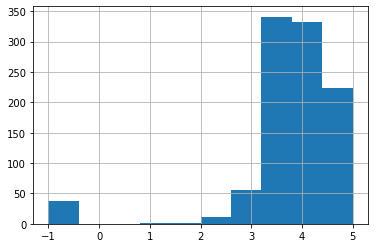

In [24]:
df.Rating.hist()

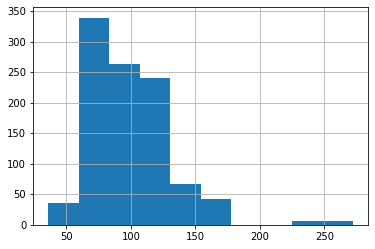

In [26]:
df.avg_salary.hist()

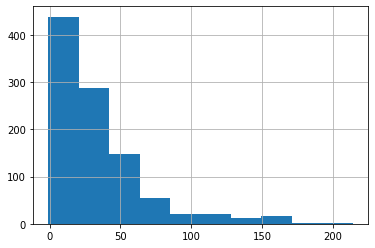

In [27]:
df.age.hist()

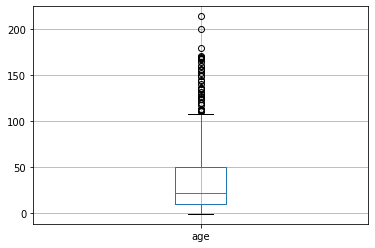

In [29]:
df.boxplot(column = 'age')

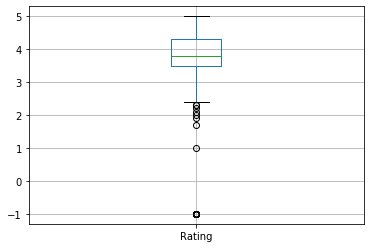

In [30]:
df.boxplot(column = 'Rating')

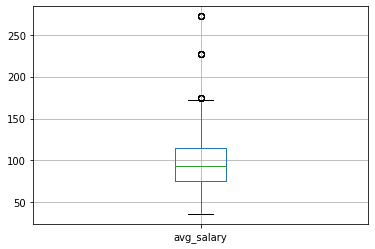

In [31]:
df.boxplot(column = 'avg_salary')

Now, our categorical data.

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'state', 'age', 'same_state',
       'job_desc', 'python', 'r_studio', 'spark', 'tensor_flow', 'sas', 'spss',
       'java', 'cpp', 'csharp', 'net', 'devops', 'aws', 'seniority', 'job_cat',
       'desc_length'],
      dtype='object')

In [ ]:
df_cat = df[['Rating', 'Size', ''Type of ownership', 'Industry', 'Sector', 'Revenue'']]